In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from joblib import dump, load
import numpy as np
from sklearn.multioutput import MultiOutputClassifier

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the location of the file
%cd /content/drive/Shareddrives/ACS6403 - Group Project/Deliverable 5 Final Project Report/Ensemble Model _ Final/

# List the files to confirm
!ls

# Load input and output data
input_data_1 = '/content/drive/Shareddrives/ACS6403 - Group Project/Preprocessed Data/input_data.txt'  # Update the path
output_data_1 = '/content/drive/Shareddrives/ACS6403 - Group Project/Preprocessed Data/output_data.txt'  # Update the path

input_Data = pd.read_csv(input_data_1, sep=',')
input_Data.columns = ['Input 1', 'Input 2', 'Input 3']

output_Data = pd.read_csv(output_data_1, sep='\s+')
output_Data.columns = ['Output 1', 'Output 2', 'Output 3', 'Output 4', 'Output 5', 'Output 6', 'Output 7']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale input and output data
input_Data_normalized = scaler.fit_transform(input_Data)
input_Data_normalized = pd.DataFrame(input_Data_normalized, columns=input_Data.columns)
output_Data_normalized = scaler.fit_transform(output_Data)
output_Data_normalized = pd.DataFrame(output_Data_normalized, columns=output_Data.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_Data_normalized, output_Data_normalized, test_size=0.4, random_state=42)

# List of algorithms
algorithms = ['svr']

# Load models and store their predictions
all_predictions = []

for algo_name in algorithms:
    for index in range(1, 8):  # Assuming there are 7 models per algorithm
        filename = f'{algo_name}_model_for_output_{index}.joblib'
        model = load(filename)
        predictions = model.predict(X_test)
        all_predictions.append(predictions.reshape(-1, 1))

# Combine all predictions into a single matrix
combined_predictions = np.hstack(all_predictions)

# Print the combined predictions shape
print("Combined predictions shape:", combined_predictions.shape)

# Ensure the shapes are correct before further splitting
print("y_test shape:", y_test.shape)

# Adjusting the split for combined_predictions and y_test to match their shapes
test_size = combined_predictions.shape[0] / (combined_predictions.shape[0] + y_train.shape[0])
X_train_preds, X_test_preds, y_train_preds, y_test_preds = train_test_split(combined_predictions, y_test, test_size=test_size, random_state=42)

# Print shapes to confirm
print("X_train_preds shape:", X_train_preds.shape)
print("y_train_preds shape:", y_train_preds.shape)
print("X_test_preds shape:", X_test_preds.shape)
print("y_test_preds shape:", y_test_preds.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/ACS6403 - Group Project/Deliverable 5 Final Project Report/Ensemble Model _ Final
'Ensemble_Model Version 2.ipynb'   svr_model_for_output_4.joblib
 poly_model_for_output_1.joblib    svr_model_for_output_5.joblib
 poly_model_for_output_2.joblib    svr_model_for_output_6.joblib
 poly_model_for_output_3.joblib    svr_model_for_output_7.joblib
 poly_model_for_output_4.joblib   'svr_model_for_output_Output 1.joblib'
 poly_model_for_output_5.joblib   'svr_model_for_output_Output 2.joblib'
 poly_model_for_output_6.joblib   'svr_model_for_output_Output 3.joblib'
 poly_model_for_output_7.joblib   'svr_model_for_output_Output 4.joblib'
 svr_model_for_output_1.joblib	  'svr_model_for_output_Output 5.joblib'
 svr_model_for_output_2.joblib	  'svr_model_for_output_Output 6.joblib'
 svr_model_for_output_3.joblib	  'svr_model_for_output_Output 7.j

376/376 [==============================] - 0s 770us/step


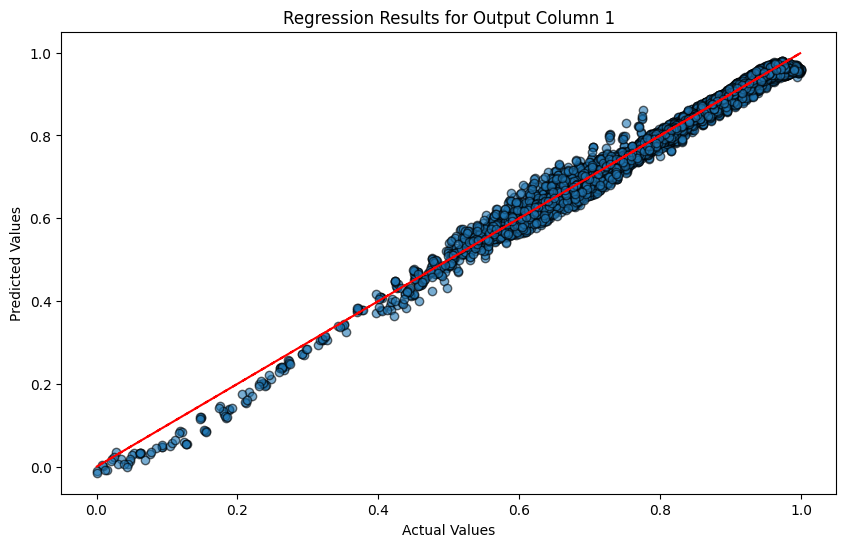

MSE for output column 1: 0.00025542779579377795
MAE for output column 1: 0.012006253922405228
Standard Deviation of Predictions for output column 1: 0.13605087995529175
376/376 [==============================] - 0s 857us/step


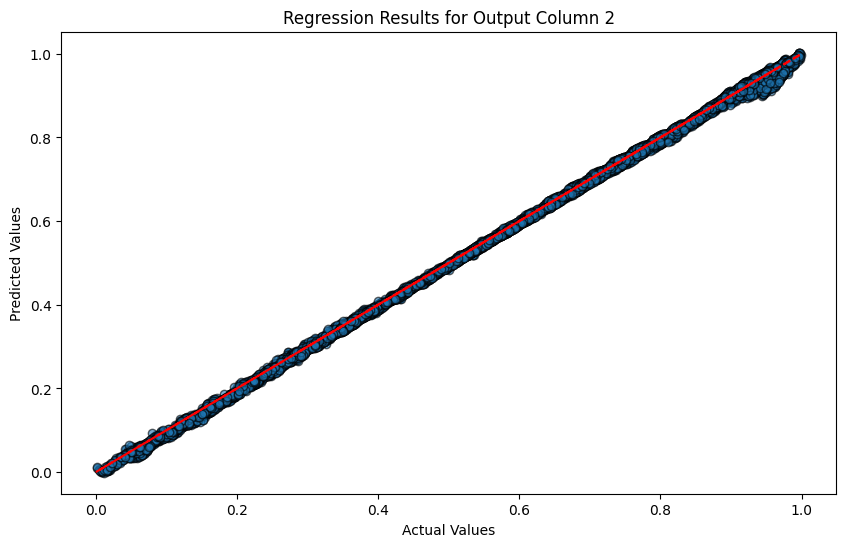

MSE for output column 2: 6.489542169158989e-05
MAE for output column 2: 0.006334598710699515
Standard Deviation of Predictions for output column 2: 0.28014710545539856
376/376 [==============================] - 0s 840us/step


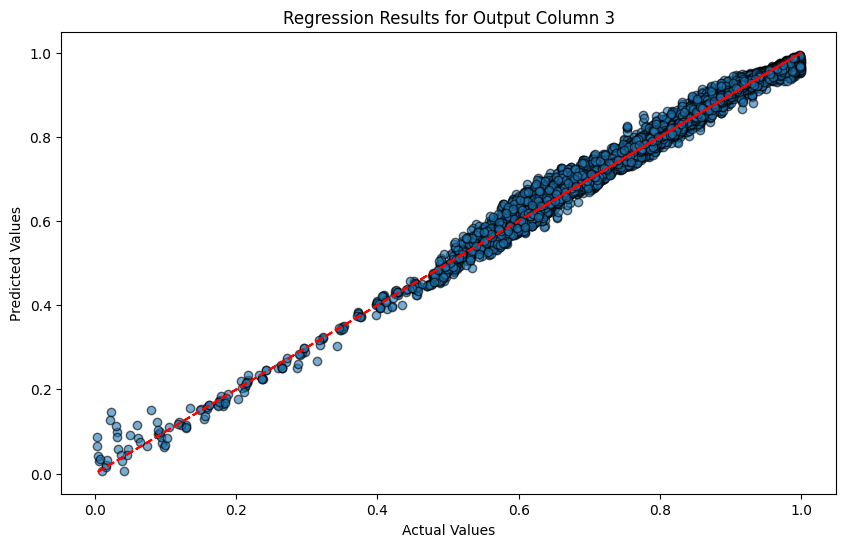

MSE for output column 3: 0.00022679190178663295
MAE for output column 3: 0.011032894467051815
Standard Deviation of Predictions for output column 3: 0.13678841292858124
376/376 [==============================] - 0s 836us/step


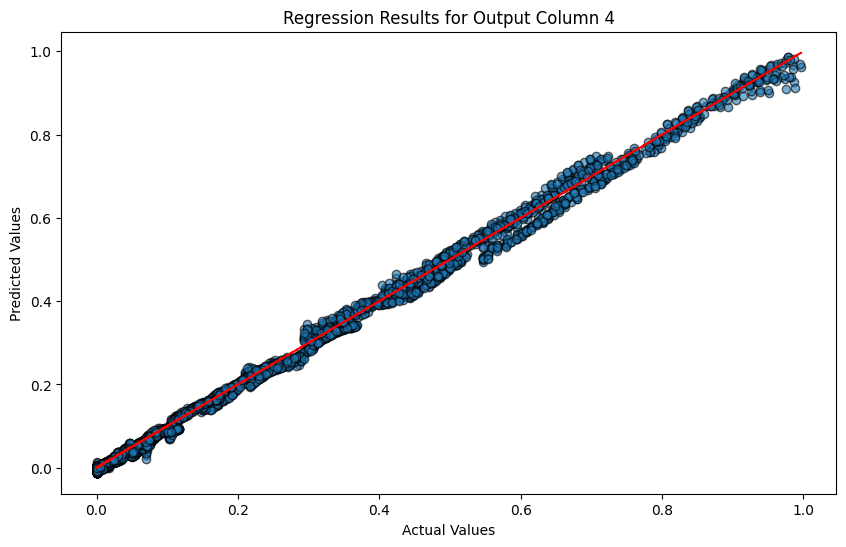

MSE for output column 4: 7.95883459389298e-05
MAE for output column 4: 0.005951085430195362
Standard Deviation of Predictions for output column 4: 0.18272586166858673
376/376 [==============================] - 0s 852us/step


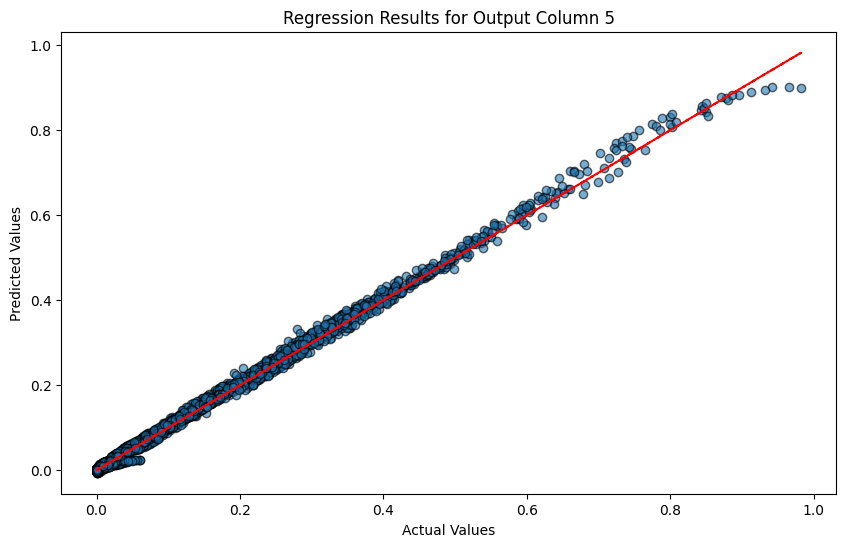

MSE for output column 5: 3.220964612063196e-05
MAE for output column 5: 0.0033805489695554747
Standard Deviation of Predictions for output column 5: 0.1101856529712677
376/376 [==============================] - 0s 850us/step


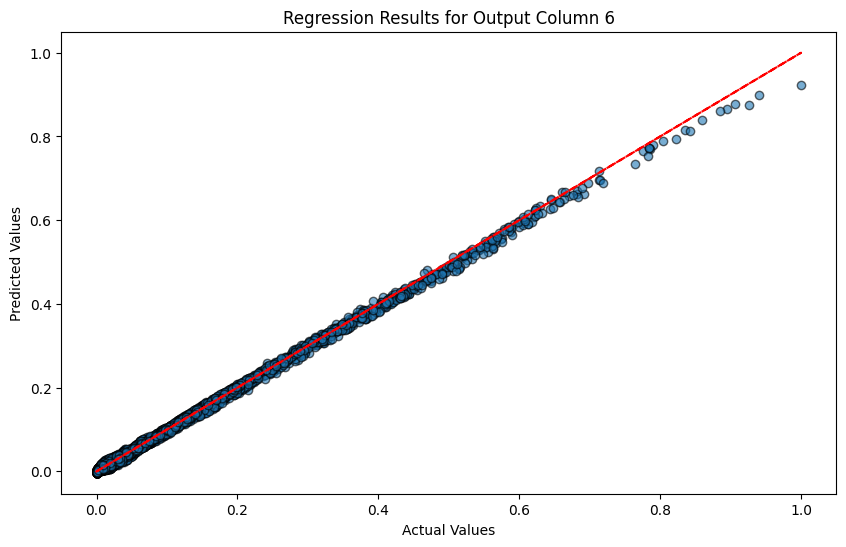

MSE for output column 6: 1.629635266872172e-05
MAE for output column 6: 0.0025211934866238976
Standard Deviation of Predictions for output column 6: 0.0956592708826065
376/376 [==============================] - 0s 865us/step


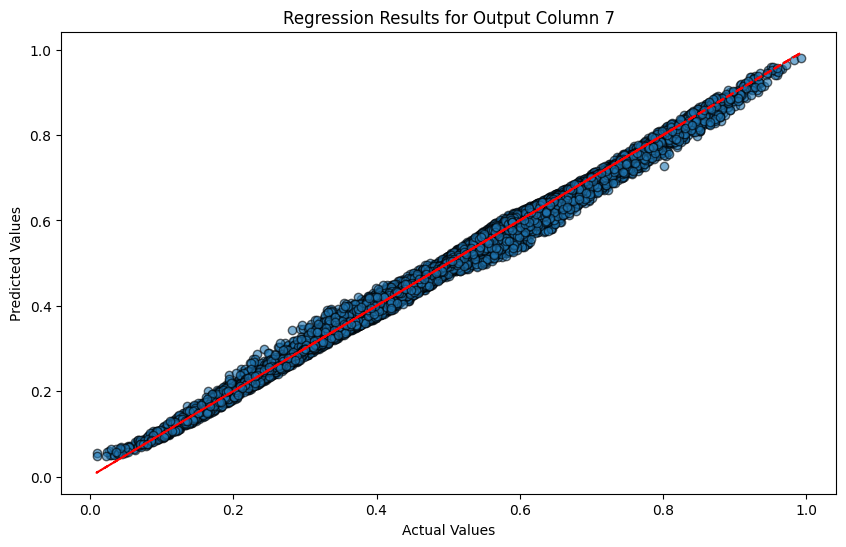

MSE for output column 7: 0.0002473193196458809
MAE for output column 7: 0.012016752055718793
Standard Deviation of Predictions for output column 7: 0.17859019339084625
Average Mean Squared Error: 0.0001317898262351665
Average Mean Absolute Error: 0.007606189577464298
Average Standard Deviation of Predictions: 0.16002105176448822


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Assuming X_train_preds, y_train_preds, X_test_preds, and y_test_preds are defined
# Example placeholder definitions (replace with your actual data)
# X_train_preds = pd.DataFrame(np.random.rand(100, 10))
# y_train_preds = pd.DataFrame(np.random.rand(100, 5))
# X_test_preds = pd.DataFrame(np.random.rand(20, 10))
# y_test_preds = pd.DataFrame(np.random.rand(20, 5))

models = []
mse_scores = []
mae_scores = []
std_dev_predictions = []

# Ensure the correct handling of DataFrame indexing
num_outputs = y_train_preds.shape[1]  # Number of output columns

for i in range(num_outputs):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train_preds.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))  # Single output neuron, as we're predicting one column at a time

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Use .iloc to correctly index DataFrame by rows for all rows (:), and column i
    model.fit(X_train_preds, y_train_preds.iloc[:, i], epochs=50, batch_size=10, verbose=0)
    pred = model.predict(X_test_preds)

    mse = mean_squared_error(y_test_preds.iloc[:, i], pred)
    mae = mean_absolute_error(y_test_preds.iloc[:, i], pred)
    models.append(model)
    mse_scores.append(mse)
    mae_scores.append(mae)

    # Calculate standard deviation of predictions
    std_dev = np.std(pred)
    std_dev_predictions.append(std_dev)

    # Plotting regression results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_preds.iloc[:, i], pred, edgecolor='k', alpha=0.6)
    plt.plot(y_test_preds.iloc[:, i], y_test_preds.iloc[:, i], 'r--')
    plt.title(f'Regression Results for Output Column {i+1}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

    print(f'MSE for output column {i+1}: {mse}')
    print(f'MAE for output column {i+1}: {mae}')
    print(f'Standard Deviation of Predictions for output column {i+1}: {std_dev}')

# Calculating average MSE, MAE, and standard deviation across all outputs
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_std_dev = np.mean(std_dev_predictions)

print(f'Average Mean Squared Error: {average_mse}')
print(f'Average Mean Absolute Error: {average_mae}')
print(f'Average Standard Deviation of Predictions: {average_std_dev}')

# Sensitivity analysis for feature 1 and output 1
feature_index = 0  # Feature 1
output_index = 0  # Output 1

# Vary feature 1 in the range of its min and max values
feature_1_values = np.linspace(X_train_preds.iloc[:, feature_index].min(), X_train_preds.iloc[:, feature_index].max(), 100)
predicted_output_1 = []

# Keep all other features constant by taking the mean of each feature
mean_features = X_train_preds.mean().values

for val in feature_1_values:
    test_sample = mean_features.copy()
    test_sample[feature_index] = val
    test_sample = test_sample.reshape(1, -1)
    prediction = models[output_index].predict(test_sample)
    predicted_output_1.append(prediction[0, 0])

# Calculate confidence intervals (95% CI)
std_error = np.std(predicted_output_1) / np.sqrt(len(predicted_output_1))
ci95 = 1.96 * std_error
upper_bound = np.array(predicted_output_1) + ci95
lower_bound = np.array(predicted_output_1) - ci95

# Plotting sensitivity analysis
plt.figure(figsize=(8, 6))
plt.plot(feature_1_values, predicted_output_1, label='Model Prediction', color='red')
plt.plot(feature_1_values, upper_bound, '--', label='+ci95%', color='black')
plt.plot(feature_1_values, lower_bound, '--', label='-ci95%', color='black')
plt.fill_between(feature_1_values, lower_bound, upper_bound, color='gray', alpha=0.2)
plt.xlabel("Feature 1 (Normalized 'Cr' content)")
plt.ylabel("Output 1 (Impact Energy - Joules)")
plt.title("Sensitivity Analysis for Feature 1 and Output 1")
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 22ms/step


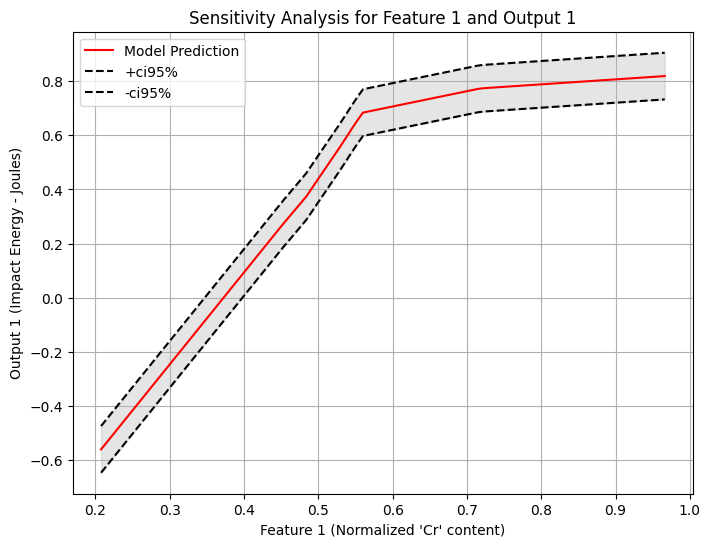